In [ ]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay,roc_curve,roc_auc_score,log_loss
import matplotlib.pyplot as plt  
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.compose import make_column_selector,make_column_transformer

In [6]:
Exp_Salaries_df = pd.read_csv(r'..\Datasets\Exp_Salaries.csv')
Exp_Salaries_df.head()

,Salary,Years_Previous_Experience,Years Employed,Years_Education,Gender,Department,Number_Supervised
0,32782,1,0,7,Male,A,0
1,32920,3,15,9,Female,A,4
2,29548,6,5,1,Male,A,0
3,39828,6,18,5,Female,A,5
4,31528,11,3,3,Male,A,6


In [13]:
# ohe=OneHotEncoder(sparse=False, drop='first').set_output(transform='pandas')
# ohe.fit_transform(Exp_Salaries_df[['Gender','Department']]).head()
# ct=make_column_transformer((ohe, ['Gender','Department']), remainder='passthrough',verbose_feature_names_out=False)
# ct.set_output(transform='pandas')
# ohe_df=ct.fit_transform(Exp_Salaries_df)

# ohe_df.head()

from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler,MinMaxScaler

scalar = StandardScaler()
minmax_scalar = MinMaxScaler()
ohe=OneHotEncoder(sparse=False, drop='first').set_output(transform='pandas')
ct1=make_column_transformer((ohe, make_column_selector(dtype_include='object')), remainder=scalar,verbose_feature_names_out=False)
ct1=ct1.set_output(transform='pandas')
X_ohe=ct1.fit_transform(X)
X_train,X_test,y_train,y_test = train_test_split(X_ohe,y,test_size=0.3,random_state=25)

In [14]:
X= Exp_Salaries_df.drop(columns=['Salary'])
y= Exp_Salaries_df['Salary']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=25,stratify=y)
y_train

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

0.8253968253968254

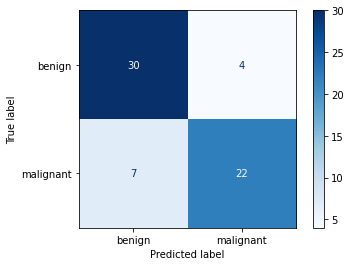

In [7]:

knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)


cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['benign', 'malignant'])
disp.plot(cmap='Blues')
accuracy_score(y_test,y_pred)

In [9]:
y_pred_proba=knn.predict_proba(X_test)
probs=y_pred_proba[:,1]
probs

array([1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0.,
       0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1.])

In [10]:
roc_auc_score(y_test,y_pred_proba[:,1])

0.8204868154158215

In [15]:
# calculate for 1,3,5,7,9
scores=[]
for i in range(1,10,2):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_pred_proba=knn.predict_proba(X_test)
    scores.append([i,(roc_auc_score(y_test,y_pred_proba[:,1]))])
df_scores=pd.DataFrame(scores,columns=['neighbors','Auc score'])
df_scores.sort_values(by='Auc score',ascending=False,inplace=True)


df_scores

,neighbors,Auc score
1,3,0.879817
2,5,0.867647
3,7,0.832150
0,1,0.820487
4,9,0.760142


### HR DAta set

In [17]:
human_df = pd.read_csv(r'..\Cases\human-resources-analytics\HR_comma_sep.csv')
human_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.10,0.77,6,247,4,0,1,0,sales,low
3,0.92,0.85,5,259,5,0,1,0,sales,low
4,0.89,1.00,5,224,5,0,1,0,sales,low


In [23]:
X= human_df.drop(columns=['left'])
y= human_df['left']

In [ ]:
ohe=OneHotEncoder(sparse=False, drop='first').set_output(transform='pandas')
ct1=make_column_transformer((ohe, make_column_selector(dtype_include='object')), remainder='passthrough',verbose_feature_names_out=False)
ct1=ct1.set_output(transform='pandas')
X_ohe=ct1.fit_transform(X)
X_train,X_test,y_train,y_test = train_test_split(X_ohe,y,test_size=0.3,random_state=25)


,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_low,salary_medium,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
8288,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.79,0.87,3,218,3,0,0
3934,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.67,0.94,4,141,2,1,0
4991,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.67,0.55,5,193,3,0,0
11384,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.52,0.80,3,252,4,0,0
1360,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.41,0.52,2,147,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2934,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.52,0.67,4,210,3,1,0
10383,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.76,0.61,4,172,2,0,0
6618,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.79,0.66,3,183,3,0,0
8510,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.89,0.59,3,247,4,0,0


In [26]:
# calculate for 1,3,5,7,9
scores=[]
for i in range(1,10,2):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_pred_proba=knn.predict_proba(X_test)
    scores.append([i,(roc_auc_score(y_test,y_pred_proba[:,1]))])
df_hr=pd.DataFrame(scores,columns=['neighbors','Auc score'])
df_hr.sort_values(by='Auc score',ascending=False,inplace=True)


df_hr

,neighbors,Auc score
2,5,0.975789
3,7,0.975696
4,9,0.975514
1,3,0.973300
0,1,0.953960
